# Chapter 8: Decision Trees - Regression

## 8.1.2 Regression Trees
Decision trees are created and fitted to a dataset using a process known as recursive binary splitting in which the predictor space  $X_1, X_2, \ldots, X_p$ is repeatedly divided top-down into distinct and non-overlapping regions $R_1, R_2, \ldots, R_J$. For every observation that falls into the region $R_j$, we make the same prediction, which is simply the mean of the response values for the training observations in $R_j$. 

The goal is to find regions $R_1,\ldots, R_J$ that minimize the RSS, given by

$\sum^J_{j=1}\sum_{i\in R_j}(y_i -\hat{y}_{R_j})^2$

where $\hat{y}_{R_j}$ is the mean response for the training observations within the $j$th region. 

In practice, a regression tree can be grown to very large then pruned back to a subtree. The ultimately chosen subtree should have the lowest possible error when evaluated on the test data. In principle, cross-validation can be used to choose the best subtree, but it's computationally infeasible due to the large number of subtrees. Instead, a process known as *cost complexity pruning* is used to choose the best subtree: Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter $\alpha$. For each value of $\alpha$ there corresponds a subtree $T \subset T_0$ (where $T$ is the number of terminal nodes of the tree) such that

$\sum^{|T|}_{m=1}\sum_{i: x_i \in R_m}\left(y_i - \hat{y}_{R_m}\right)^2 + \alpha|T|$

is as small as possible. When $\alpha$ = 0, the tree is not pruned, and when $\alpha$ is increased, branches get pruned from the tree in a nested and predictable fashion, so obtaining the whole sequence of subtrees as a function of $\alpha$ is easy. We can select a value of $\alpha$ using a validation set or using cross-validation.

## Dataset: Boston

In [13]:
library(tree)

In [2]:
library(ISLR2)
attach(Boston)

In [7]:
 dim(Boston)

[1] 506  13

In [3]:
head(Boston)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21,28.7


In [6]:
# number of rows
nrow(Boston)

[1] 506

## Fit a regression tree to the train dataset

Recall that the goal of this exercise is to predict the median house prices in Boston given all the predictors

In [11]:
#Create a training set
set.seed(1)
#this is a list of indices
train <- sample(1:nrow(Boston), nrow(Boston) / 2)

In [14]:
# Fit a regression tree to the train dataset
tree.boston <- tree(medv ~ ., Boston, subset = train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

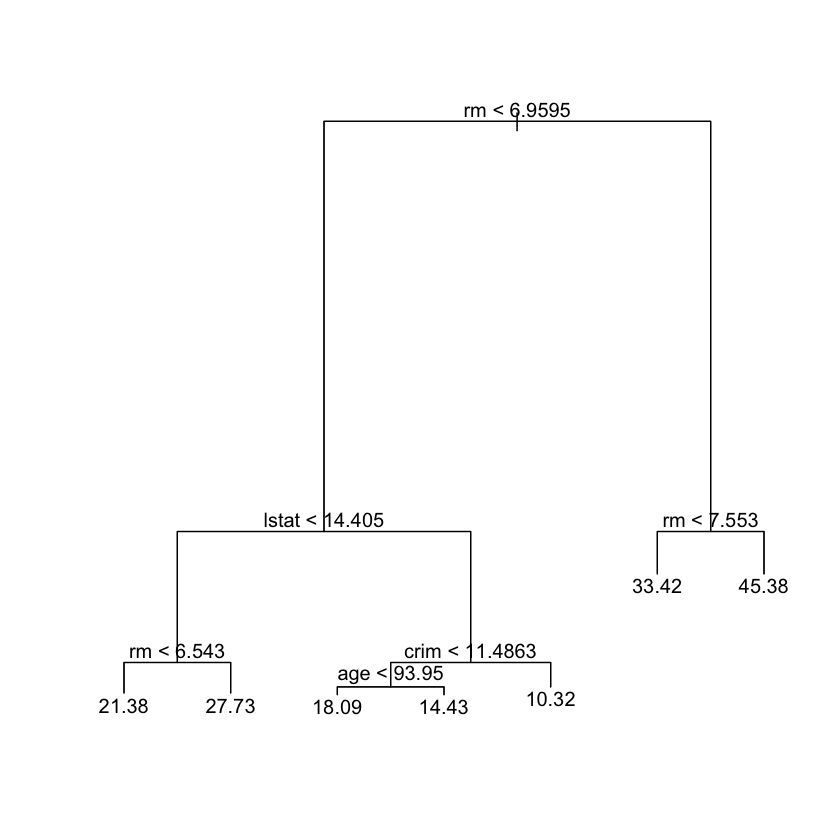

In [15]:
plot(tree.boston)
text(tree.boston, pretty = 0)

The variable *lstat* measures the percentage of individuals with lower socioeconomic status, while the variable *rm* corresponds to the average number of rooms. The tree indicates that larger values of *rm*, or lower values of *lstat*, correspond to more expensive houses. For example, the tree predicts a median house price of $45,400 for homes in census tracts in which *rm* >= 7.553.

## Prune tree using cross-validation

Now we use the *cv.tree()* function to see whether pruning the tree will improve performance.

In [18]:
cv.boston <- cv.tree(tree.boston)
cv.boston

$size
[1] 7 6 5 4 3 2 1

$dev
[1]  4618.525  4722.447  5353.821  6240.572  6650.465 10280.535 19589.355

$k
[1]       -Inf   203.9641   637.2707   796.1207  1106.4931  3424.7810 10724.5951

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

The *cv.tree()* function reports the number of terminal nodes of each tree considered (*size*) as well as the corresponding error rate and the value of the cost-complexity parameter used (*k*, which corresponds to $\alpha$ above).  *dev* corresponds to the number of cross-validation errors.

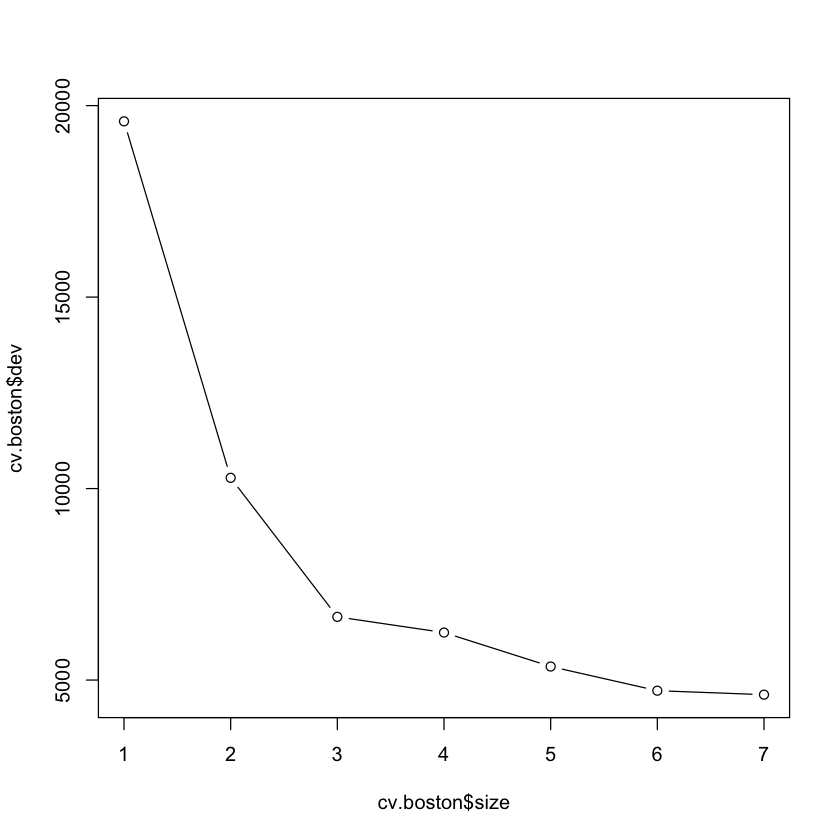

In [19]:
#plot the error rate 'dev' as function of the size
plot(cv.boston$size, cv.boston$dev, type = "b")

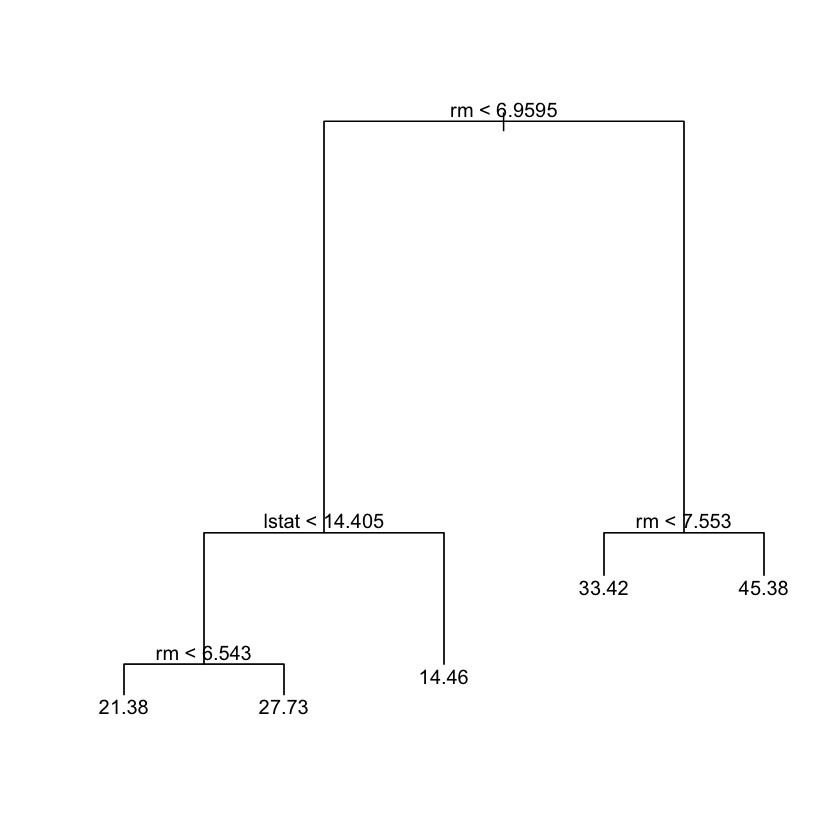

In [21]:
 prune.boston <- prune.tree(tree.boston, best = 5)
plot(prune.boston)
text(prune.boston, pretty = 0)

We use the unpruned tree to make predictions on the test set.

In [22]:
yhat <- predict(tree.boston, newdata = Boston[-train, ])

In [23]:
boston.test <- Boston[-train, "medv"]

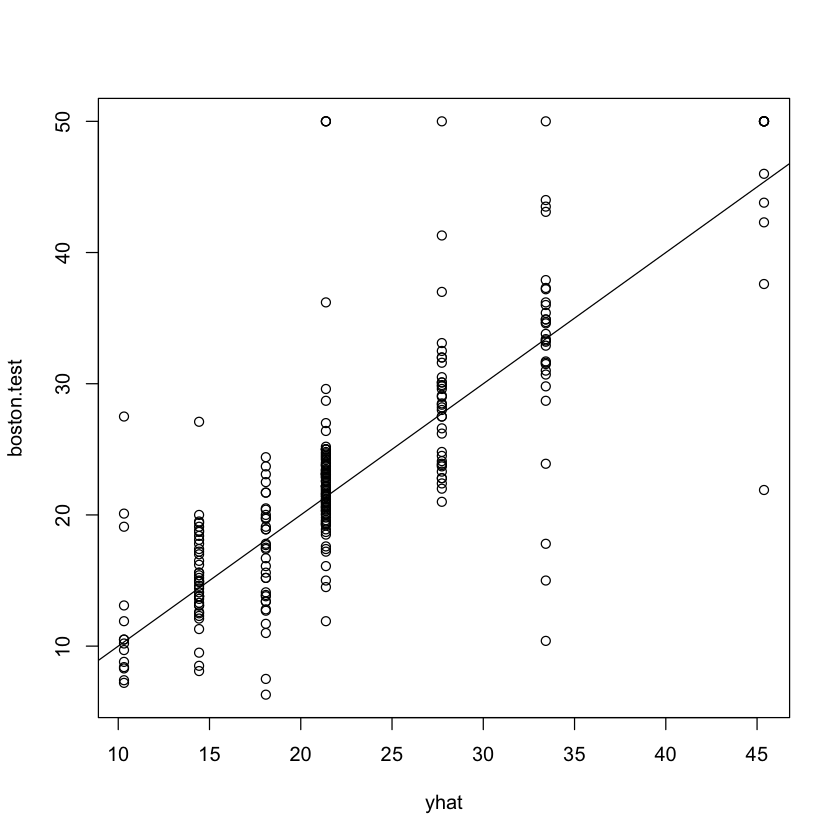

In [25]:
plot(yhat, boston.test)
abline(0, 1)

In [26]:
mean((yhat - boston.test)^2)

[1] 35.28688

What the above result means: the test set MSE associated with the regression tree is 35.29. The square root of the MSE is therefore around 5.941, indicating that this model leads to test predictions that are (on average) within approximately $5,941 of the true median home value.

# References

Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani, **An Introduction to Statistical Learning with Applications in R**, Chapter 8.
